# Glider Toolbox Demo Notebook

### Using a Pre-existing config file for a complete pipeline run

Note: Currently these imports are local references. In the future the toolbox will be an installable package through pip.

In [1]:
# add toolbox to src (THIS WILL NOT BE REQUIRED ONCE DEPLOYED)
import sys
from pathlib import Path
src_path = Path("../../src").resolve()

if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

### Pipeline Overview

In [2]:
# from toolbox.pipeline import Pipeline
# pipeline = Pipeline(   
#     "../configs/example_config_doombar.yaml")
# pipeline.run()

#### Building the pipeline one step at a time

In [3]:
# pipeline2 = Pipeline()

# class myCustomStep:
#     def __init__(self, param1, param2):
#         self.param1 = param1
#         self.param2 = param2

#     def run(self, data):
#         # Custom processing logic here
#         print(f"Running custom step with {self.param1} and {self.param2}")
#         return data  # Return processed data

# # add load step
# pipeline2.add_step(
#     "Load OG1",
#     parameters={
#         "file_path": "../../examples/data/OG1/Churchill_647_R.nc",  # Path to the input NetCDF file
#         "add_meta": False, # Add metadata to the data
#         "add_depth": True, # Add depth information to the data
#         "add_elapsed_time": False,
#         "lat_label": "DEPLOYMENT_LATITUDE"},
#     diagnostics=False,
#     run_immediately=True )# can run immediately upon creation

# # add export step
# pipeline2.add_step(
#     "Data Export",
#     parameters={
#         "export_format": "netcdf",  # Define the export format (e.g., OG1, CSV, etc.)
#         "output_path": "../../examples/data/OG1/exported_Churchill_647_R.nc"},
#     diagnostics=False,
#     run_immediately=False )# or run at a future time
# # run last step
# pipeline2.run_last_step()

In [4]:
# conf = pipeline2.export_config("../../examples/data/OG1/Churchill_647_R_CONFIG.yaml")  # Export the pipeline configuration to a YAML file
# conf

# Running Multiple Pipelines

```python

[Discovery] Scanning for step modules in /home/adamwa/Ocean Informatics/Projects/toolbox/src/toolbox/steps/custom
[Discovery] Importing step module: toolbox.steps.custom.derive_ctd
[Discovery] Importing step module: toolbox.steps.custom.export
[Discovery] Importing step module: toolbox.steps.custom.load_data
[Discovery] Importing step module: toolbox.steps.custom.argo_qc
[Discovery] Importing step module: toolbox.steps.custom.calibration
[Discovery] Importing step module: toolbox.steps.custom.find_profiles
[Discovery] Importing step module: toolbox.steps.custom.gen_data
[Discovery] Importing step module: toolbox.steps.custom.variables.salinity
[Discovery] Registered step: Derive CTD
[Discovery] Registered step: Data Export
[Discovery] Registered step: Load OG1
[Discovery] Registered step: Argo QC
[Discovery] Registered step: Find Profiles
[Discovery] Registered step: Generate Data
[Discovery] Registered step: QC: Salinity
[Discovery] Registered step: ADJ: Salinity
Step 'Load OG1' added

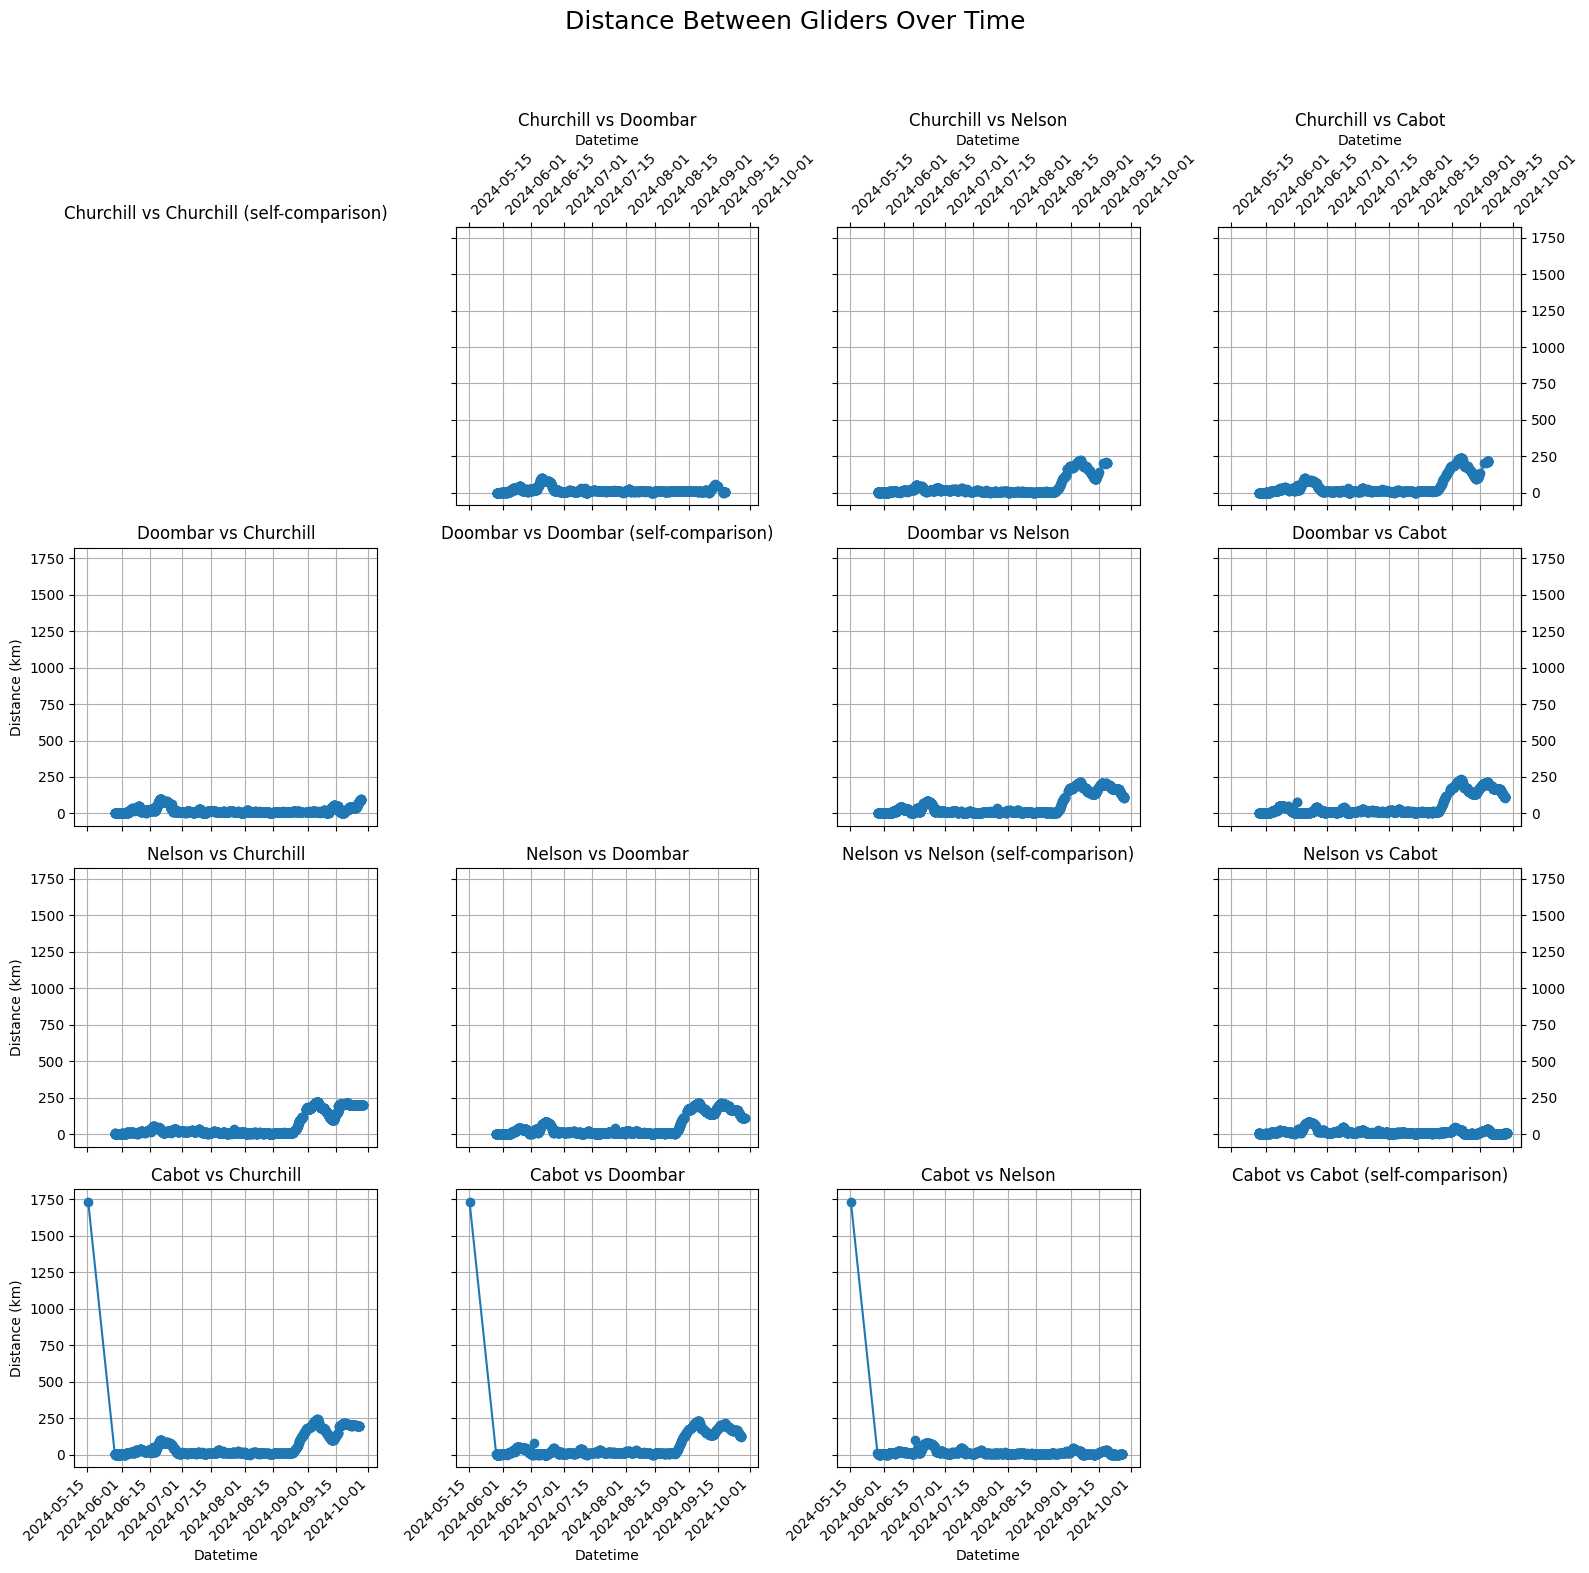

[Pipeline Manager] Finding closest profiles across gliders...


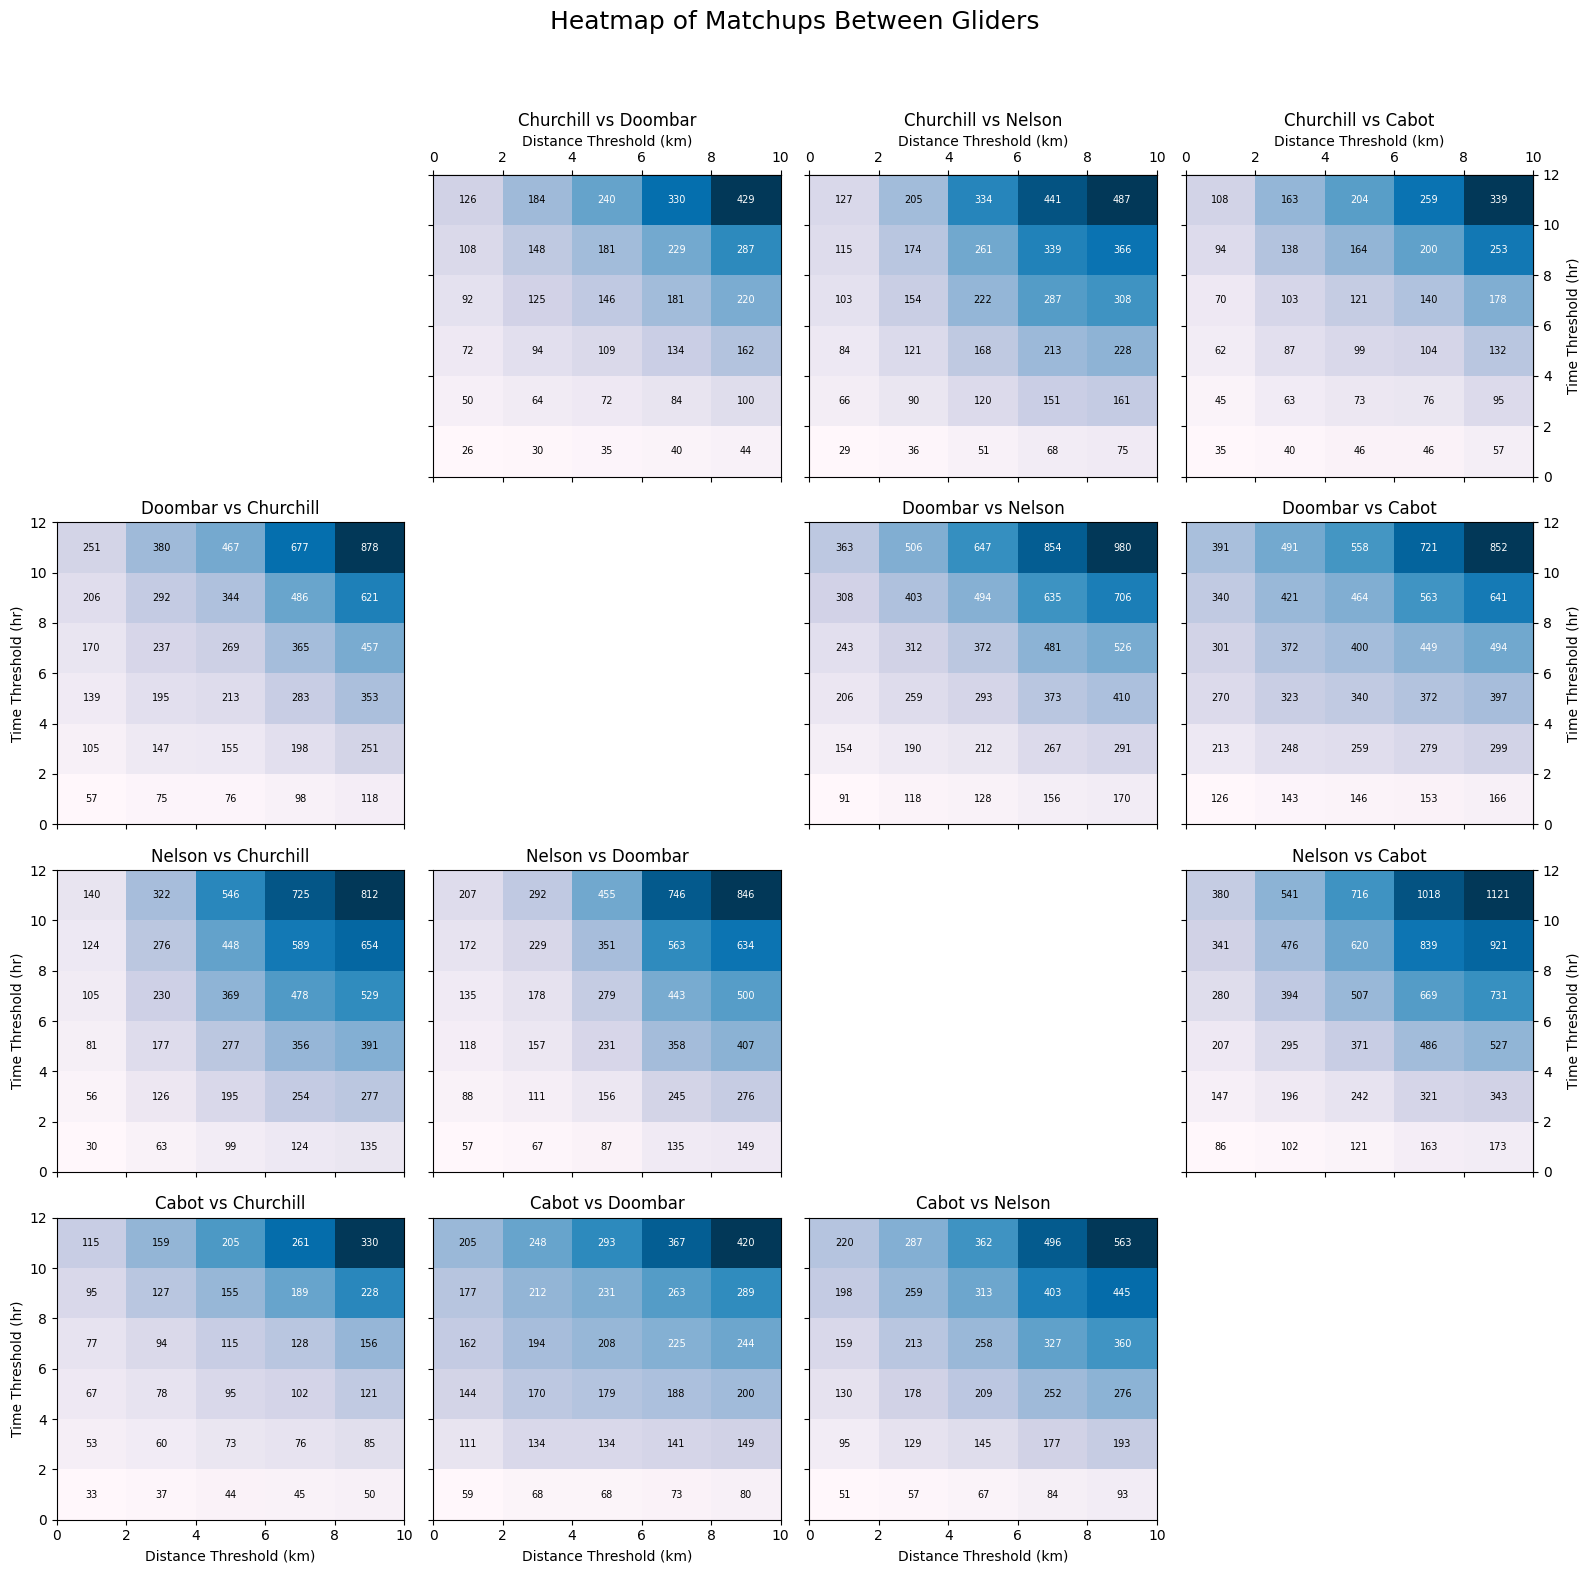

[Pipeline Manager] Heatmap grid plotted in 0 days 00:00:48.543337


In [5]:
### Running multiple pipelines using the PipelineManager class
from toolbox.pipeline import PipelineManager
mngr = PipelineManager()
mngr.load_mission_control("../configs/MissionControl.yaml")  # Load the mission control configuration
# This is currently set up to import data, run profiles, and export data for Doombar and Churchill sources.
mngr.run_all()  # Run all pipelines defined in the mission control configuration
mngr.summarise_all_profiles()

In [ ]:
mngr.preview_alignment("Cabot")  # Align data to the target source (e.g., Doombar)

[Pipeline Manager] Renaming variables: {'CNDC': 'CNDC', 'TEMP': 'TEMP'}

[Pipeline Manager] Aligning 'Churchill' to target 'Cabot'...
[Pipeline Manager] Found 330 matched profile pairs.
[Pipeline Manager] Binning data for 'Cabot'...
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...
[Pipeline Manager] Binning data for 'Churchill'...
[Pipeline Manager] Interpolating missing DEPTH values by PROFILE_NUMBER...


In [ ]:
mngr.fit_to_target("Cabot")  # Fit data to the target source (e.g., Doombar)

In [ ]:
mngr.validate_with_device("Cabot")

In [ ]:
mngr.fit_to_device("Cabot") 